In [1]:
import pandas as pd
import numpy as np

In [7]:
!python -m spacy download en_core_web_lg

     -------------------------------------- 587.7/587.7 MB 3.8 MB/s eta 0:00:00
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')


In [9]:
df = pd.read_json(r'news_dataset.json')


In [10]:
df.head()

,text,category
0,"Larry Nassar Blames His Victims, Says He 'Was ...",CRIME
1,"Woman Beats Cancer, Dies Falling From Horse",CRIME
2,Vegas Taxpayers Could Spend A Record $750 Mill...,SPORTS
3,This Richard Sherman Interception Literally Sh...,SPORTS
4,7 Things That Could Totally Kill Weed Legaliza...,BUSINESS


In [11]:
df.shape

(7500, 2)

In [12]:
df.category.value_counts()

category
CRIME       2500
SPORTS      2500
BUSINESS    2500
Name: count, dtype: int64

In [15]:
df['label'] = df['category'].map({'BUSINESS':0,'CRIME':1,'SPORTS':2})

In [16]:
df.head()

,text,category,label
0,"Larry Nassar Blames His Victims, Says He 'Was ...",CRIME,1
1,"Woman Beats Cancer, Dies Falling From Horse",CRIME,1
2,Vegas Taxpayers Could Spend A Record $750 Mill...,SPORTS,2
3,This Richard Sherman Interception Literally Sh...,SPORTS,2
4,7 Things That Could Totally Kill Weed Legaliza...,BUSINESS,0


In [28]:
import spacy
nlp = spacy.load("en_core_web_lg")
def preprocess(text):    
    doc = nlp(text)
    preprocessed_tokens = []
    for token in doc:
        if token.is_stop or token.is_punct:
            continue
            
        preprocessed_tokens.append(token.lemma_)    
        
    return ' '.join(preprocessed_tokens)
  

In [29]:
df['preprocessed_text'] = df['text'].apply(lambda text:preprocess(text))

In [30]:
df.head()

,text,category,label,preprocessed_text
0,"Larry Nassar Blames His Victims, Says He 'Was ...",CRIME,1,Larry Nassar blame victim say victimize newly ...
1,"Woman Beats Cancer, Dies Falling From Horse",CRIME,1,woman Beats Cancer die fall horse
2,Vegas Taxpayers Could Spend A Record $750 Mill...,SPORTS,2,vegas taxpayer spend Record $ 750 million New ...
3,This Richard Sherman Interception Literally Sh...,SPORTS,2,Richard Sherman Interception literally shake W...
4,7 Things That Could Totally Kill Weed Legaliza...,BUSINESS,0,7 thing totally kill Weed Legalization Buzz


In [31]:
df['vector'] = df['preprocessed_text'].apply(lambda text:nlp(text).vector)

In [32]:
df.head()

,text,category,label,preprocessed_text,vector
0,"Larry Nassar Blames His Victims, Says He 'Was ...",CRIME,1,Larry Nassar blame victim say victimize newly ...,"[-0.5585511, -0.29323253, -0.9253956, 0.189389..."
1,"Woman Beats Cancer, Dies Falling From Horse",CRIME,1,woman Beats Cancer die fall horse,"[-0.73039824, -0.43196002, -1.2930516, -1.0628..."
2,Vegas Taxpayers Could Spend A Record $750 Mill...,SPORTS,2,vegas taxpayer spend Record $ 750 million New ...,"[-1.9413117, 0.121578515, -3.2996283, 1.511650..."
3,This Richard Sherman Interception Literally Sh...,SPORTS,2,Richard Sherman Interception literally shake W...,"[-1.4702771, -0.685319, 0.57398, -0.31135806, ..."
4,7 Things That Could Totally Kill Weed Legaliza...,BUSINESS,0,7 thing totally kill Weed Legalization Buzz,"[-1.037173, -1.9495698, -1.7179357, 1.2975286,..."


In [33]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(df.vector.values,df.label,test_size = 0.2,random_state=2)

In [34]:
X_train.shape, X_test.shape

((6000,), (1500,))

In [35]:
X_train_2d = np.stack(X_train)
X_test_2d = np.stack(X_test)

In [49]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_X_train = scaler.fit_transform(X_train_2d)
scaled_X_test = scaler.fit_transform(X_test_2d)

    

clf = MultinomialNB()
clf.fit(scaled_X_train,y_train)


MultinomialNB()

In [50]:
y_pred = clf.predict(scaled_X_test)

In [51]:
from sklearn.metrics import classification_report
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.84      0.75      0.79       526
           1       0.87      0.84      0.86       535
           2       0.75      0.87      0.81       439

    accuracy                           0.82      1500
   macro avg       0.82      0.82      0.82      1500
weighted avg       0.82      0.82      0.82      1500



In [52]:
from sklearn.tree import DecisionTreeClassifier

clf_dt = DecisionTreeClassifier()
clf_dt.fit(X_train_2d,y_train)

y_pred = clf_dt.predict(X_test_2d)
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.71      0.71      0.71       465
           1       0.72      0.73      0.72       515
           2       0.70      0.69      0.69       520

    accuracy                           0.71      1500
   macro avg       0.71      0.71      0.71      1500
weighted avg       0.71      0.71      0.71      1500



              precision    recall  f1-score   support

           0       0.90      0.84      0.87       497
           1       0.89      0.87      0.88       527
           2       0.84      0.91      0.87       476

    accuracy                           0.87      1500
   macro avg       0.87      0.87      0.87      1500
weighted avg       0.88      0.87      0.87      1500



Text(95.72222222222221, 0.5, 'Truth')

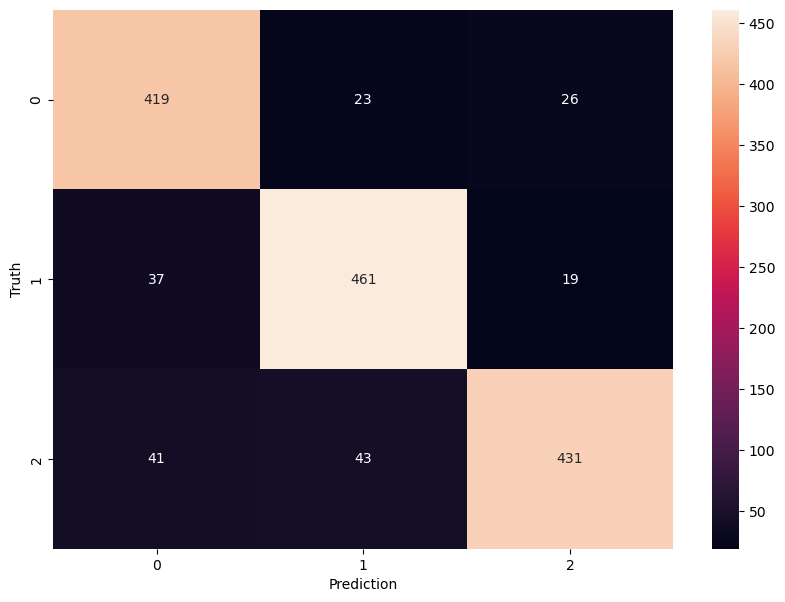

In [60]:
from sklearn.ensemble import RandomForestClassifier

clf_rf = RandomForestClassifier()
clf_rf.fit(X_train_2d,y_train)

y_pred = clf_rf.predict(X_test_2d)
print(classification_report(y_pred,y_test))

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm


from matplotlib import pyplot as plt
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')

In [55]:
from  sklearn.neighbors import KNeighborsClassifier


#1. creating a KNN model object
clf_KNN = KNeighborsClassifier(n_neighbors = 5, metric = 'euclidean')
clf_KNN.fit(X_train_2d,y_train)

y_pred = clf_KNN.predict(X_test_2d)
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.90      0.80      0.85       526
           1       0.90      0.83      0.86       557
           2       0.76      0.94      0.84       417

    accuracy                           0.85      1500
   macro avg       0.85      0.86      0.85      1500
weighted avg       0.86      0.85      0.85      1500



C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [59]:
type(X_test)

numpy.ndarray